In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

In [14]:
machine = pd.read_csv('Equipment data from keggel/PdM_machines.csv')
maintenance = pd.read_csv('Equipment data from keggel/PdM_maint.csv')
telemetry = pd.read_csv('Equipment data from keggel/PdM_telemetry.csv')
failures = pd.read_csv('Equipment data from keggel/PdM_failures.csv')
errors = pd.read_csv('Equipment data from keggel/PdM_errors.csv')



In [15]:
maintenance['datetimetime'] = pd.to_datetime(maintenance['datetime'])
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'])
errors['datetime'] = pd.to_datetime(errors['datetime'])
failures['datetime'] = pd.to_datetime(failures['datetime'])

In [16]:
telemetry_merge = pd.merge(telemetry, machine, on='machineID', how='left')
telemetry_mean = telemetry.groupby('machineID').mean().reset_index()
maintenance_merged = pd.merge(maintenance, machine, on='machineID', how='left')


merged_data = pd.merge(machine, telemetry_mean, on='machineID', how='left')
maintenance_count = maintenance.groupby('machineID').size().reset_index(name='maintenance_count')
print(telemetry_merge)

                  datetime  machineID        volt      rotate    pressure  \
0      2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1      2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2      2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3      2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4      2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   
...                    ...        ...         ...         ...         ...   
876095 2016-01-01 02:00:00        100  179.438162  395.222827  102.290715   
876096 2016-01-01 03:00:00        100  189.617555  446.207972   98.180607   
876097 2016-01-01 04:00:00        100  192.483414  447.816524   94.132837   
876098 2016-01-01 05:00:00        100  165.475310  413.771670  104.081073   
876099 2016-01-01 06:00:00        100  171.336037  496.096870   79.095538   

        vibration   model  age  
0       45.087686  model3   18  
1       4

Visualization of Machines maintanace 

In [ ]:
machine_id = 28  # replace with your machine ID
machine_maintenance = maintenance[maintenance['machineID'] == machine_id]


machine_maintenance['datetime'] = pd.to_datetime(machine_maintenance['datetime'])
maintenance_counts = machine_maintenance['datetime'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
maintenance_counts.plot(kind='line')
plt.title(f'Maintenance frequency for machine {machine_id}')
plt.xlabel('Date')
plt.ylabel('Maintenance count')
plt.show()

Visualization of Errors on each machines And Which error happens the most

In [ ]:


# Count the number of errors per machine
error_counts = errors['machineID'].value_counts().reset_index()
error_counts.columns = ['machineID', 'error_count']

# Plotting
plt.figure(figsize=(30, 6))
sns.barplot(x='machineID', y='error_count', data=error_counts, palette='viridis')
plt.title('Number of Errors per Machine')
plt.xlabel('Machine ID')
plt.ylabel('Error Count')
plt.xticks(rotation=45)
plt.show()

# Pie chart for the distribution of error types
plt.figure(figsize=(10, 6))
error_type_counts = errors['errorID'].value_counts()
plt.pie(error_type_counts, labels=error_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Error Types')
plt.axis('equal')
plt.show()


In [ ]:
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'])

# Plot telemetry data 
plt.figure(figsize=(15,10))
sns.lineplot(x='datetime', y='volt', data=telemetry ,label='volt')
sns.lineplot(x='datetime', y='rotate', data=telemetry ,label='rotate')
sns.lineplot(x='datetime', y='pressure', data=telemetry ,label='pressure')
sns.lineplot(x='datetime', y='vibration', data=telemetry ,label='vibration')

plt.title('Telemertry data')
plt.xlabel('Time')
plt.ylabel('Telemerry Value')
plt.legend()
plt.grid(True)
plt.show()

Merged table for distrubution chart

In [ ]:
print("Merged Telemetry Data Table:")
print(telemetry_merge.head())
plt.figure(figsize=(14, 8))

C:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\natha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

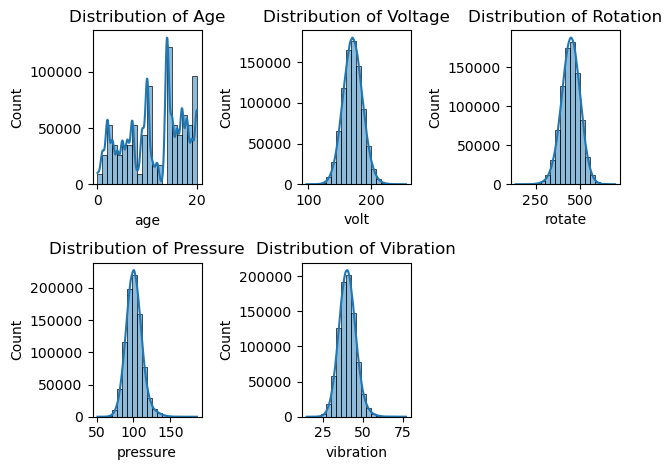

In [6]:
plt.subplot(2, 3, 1)
sns.histplot(telemetry_merge['age'], bins=20, kde=True)
plt.title('Distribution of Age')

plt.subplot(2, 3, 2)
sns.histplot(telemetry_merge['volt'], bins=20, kde=True)
plt.title('Distribution of Voltage')

plt.subplot(2, 3, 3)
sns.histplot(telemetry_merge['rotate'], bins=20, kde=True)
plt.title('Distribution of Rotation')

plt.subplot(2, 3, 4)
sns.histplot(telemetry_merge['pressure'], bins=20, kde=True)
plt.title('Distribution of Pressure')

plt.subplot(2, 3, 5)
sns.histplot(telemetry_merge['vibration'], bins=20, kde=True)
plt.title('Distribution of Vibration')

plt.tight_layout()
plt.show()

Find out frequency of Maintenance, Error by components and Failures by Machine Model

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='model', data=maintenance_merged)
plt.title('Frequency of Maintenance Events by Machine Model')
plt.xlabel('Machine Model')
plt.ylabel('Frequency of Maintenance Events')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(12, 6))
sns.countplot(x='failure', data=failures)
plt.title('Frequency of Errors by Component')
plt.xlabel('Component')
plt.ylabel('Frequency of Errors')
plt.show()


plt.figure(figsize=(12, 6))
failures_merged = pd.merge(failures, machine, on='machineID', how='left')
sns.countplot(x='model', data=failures_merged)
plt.title('Frequency of Failures by Machine Model')
plt.xlabel('Machine Model')
plt.ylabel('Frequency of Failures')
plt.xticks(rotation=45)
plt.show()

Learn the correlation of the telemetry data using correlation method

In [ ]:
correlation = telemetry.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm', fmt = '.4f')
plt.title('Correlaion Matrix of Telemetry Data')
plt.xlabel('Telemetry Data')
plt.ylabel('Telemetry Data')
plt.show()

In [11]:
telemetry_With_failures = pd.merge(telemetry, failures, on=['datetime', 'machineID'], how='left')
telemetry_With_failures['failure'] = telemetry_With_failures['failure'].fillna(0)

print(telemetry_With_failures.head())

             datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration failure  
0  45.087686       0  
1  43.413973       0  
2  34.178847       0  
3  41.122144       0  
4  25.990511       0  


In [ ]:
x = telemetry_With_failures[['volt', 'rotate', 'pressure', 'vibration']]
y = telemetry_With_failures['failure']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
iso_forest = IsolationForest(contamination = 0.1, random_state = 42)
iso_forest.fit(X_train)


In [ ]:
train_anomalies = iso_forest.predict(X_train)
test_anomalies = iso_forest.predict(X_test)


In [ ]:
# Train One-Class SVM model
ocsvm = OneClassSVM(nu=0.1)  # Set the nu parameter (fraction of outliers)
ocsvm.fit(X_train)

# Predict anomalies on training and test sets
train_anomalies = ocsvm.predict(X_train)
test_anomalies = ocsvm.predict(X_test)

# Calculate accuracy for anomaly detection
if -1 in test_anomalies:
    anomalies_indices = np.where(test_anomalies == -1)[0]  # Get indices of anomalies
    correct_anomalies = np.sum(y_test.iloc[anomalies_indices] == 1)  # Count correct anomalies
    total_anomalies = len(anomalies_indices)  # Total number of anomalies
    accuracy = correct_anomalies / total_anomalies  # Calculate accuracy
    print(f"Accuracy for Anomaly Detection using One-Class SVM: {accuracy:.2f}")
else:
    print("No anomalies detected in the test set.")

In [ ]:
lof = LocalOutlierFactor(contamination = 0.1)
lof.fit(X_train)

train_anomalies = lof.fit_predict(X_train)
test_anomalies = lof.fit_predict(X_test)

if -1 in test_anomalies:
    anomalies_indices = np.where(test_anomalies == -1)[0]
    correct_anomalies = np.sum(y_test.iloc[anomalies_indices] == 1)
    total_anomalies = len(anomalies_indices)
    accuracy = correct_anomalies / total_anomalies
    print(f"Accuracy for Anomaly Detection using Local Outlier Factor: {accuracy:.2f}")
else:
    print("No anomalies detected in the test set.")

In [8]:
telemetry_With_failures['failure'] = np.where(iso_forest.predict(x) == -1, 1, 0)
telemetry_With_failures['failure'] = telemetry_With_failures.groupby('machineID')['failure'].transform('max')

NameError: name 'iso_forest' is not defined

In [7]:
print("Predicted Failures for each machiee:")
print(telemetry_With_failures[['machineID', 'failure']].drop_duplicates())

Predicted Failures for each machiee:


NameError: name 'telemetry_With_failures' is not defined

In [12]:
errors_with_telemetry = pd.merge(errors,telemetry, on=['machineID','datetime'], how='left')

specific_error = 1
error_telemetry = errors_with_telemetry[errors_with_telemetry['errorID'] == specific_error]
print(error_telemetry[['datetime','volt','rotate','pressure','vibration']])

Empty DataFrame
Columns: [datetime, volt, rotate, pressure, vibration]
Index: []


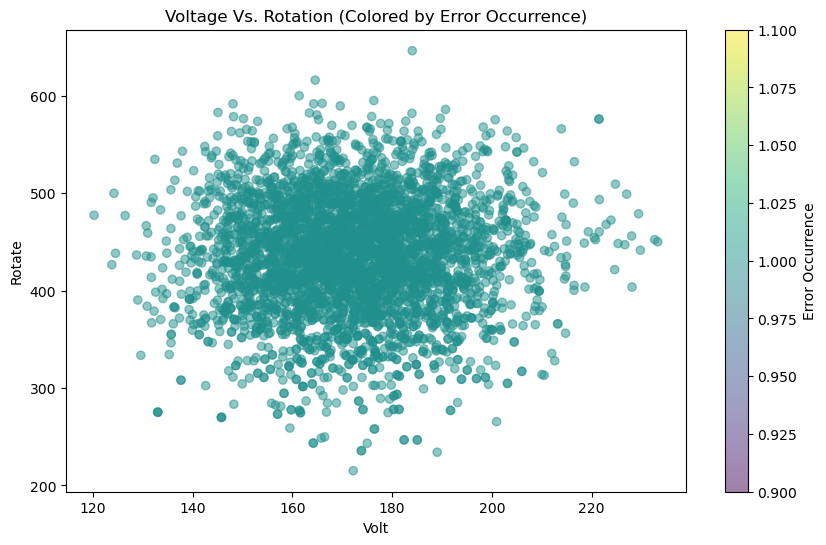

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(errors_with_telemetry['volt'],errors_with_telemetry['rotate'], c=errors_with_telemetry['errorID'].notnull(),cmap='viridis',alpha=0.5)
plt.colorbar(label='Error Occurrence')
plt.xlabel('Volt')
plt.ylabel('Rotate')
plt.title('Voltage Vs. Rotation (Colored by Error Occurrence)')
plt.show()

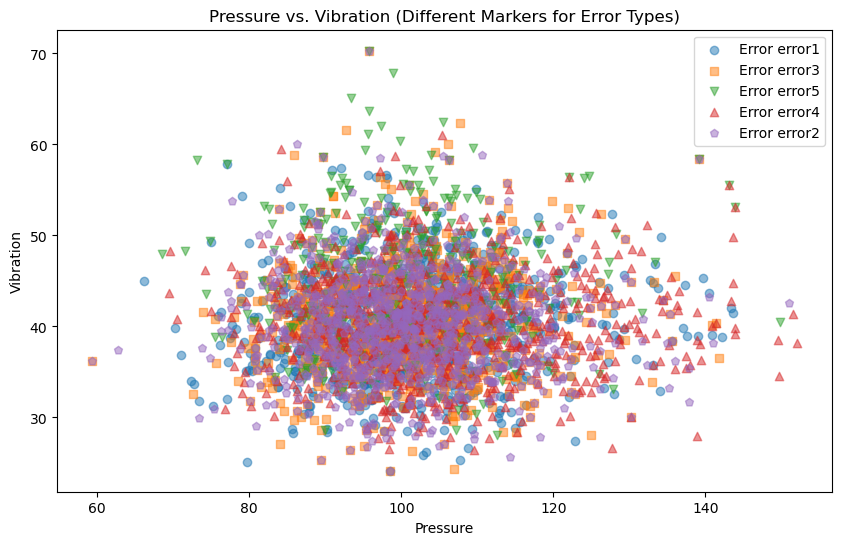

In [27]:
plt.figure(figsize=(10, 6))
markers = ['o', 's', 'v', '^', 'p']
for error_id, marker in zip(errors_with_telemetry['errorID'].unique(), markers):
    error_data = errors_with_telemetry[errors_with_telemetry['errorID'] == error_id]
    plt.scatter(error_data['pressure'], error_data['vibration'], marker=marker, label=f'Error {error_id}', alpha=0.5)
plt.xlabel('Pressure')
plt.ylabel('Vibration')
plt.title('Pressure vs. Vibration (Different Markers for Error Types)')
plt.legend()
plt.show()


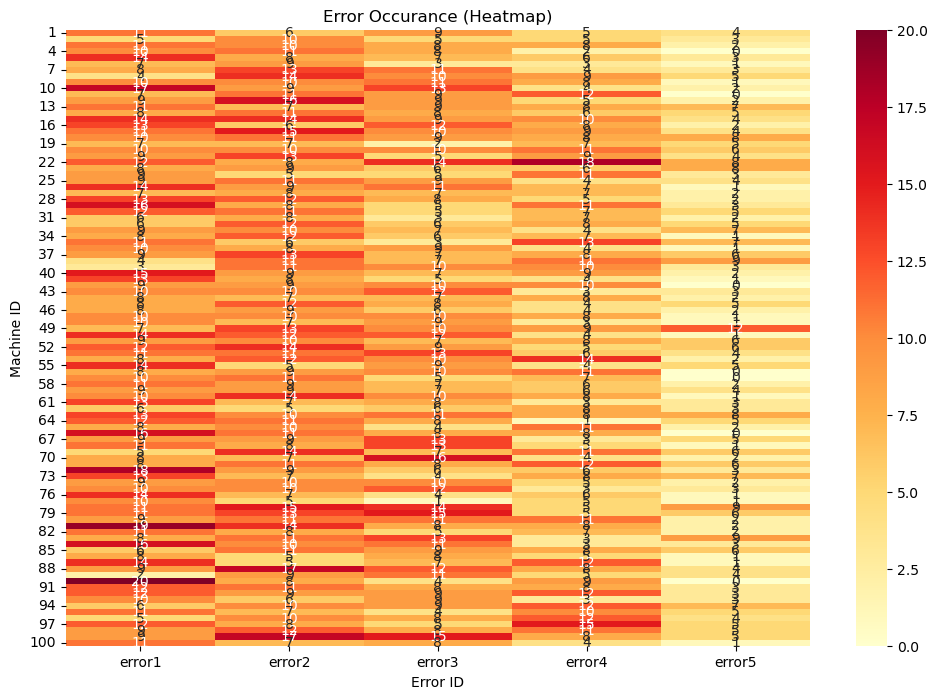

In [30]:
error_counts = errors.groupby(['machineID','errorID']).size().reset_index(name='error-count')
pivot_table = error_counts.pivot(index='machineID', columns='errorID', values='error-count').fillna(0)

plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, annot=True, cmap='YlOrRd', fmt='g')
plt.title('Error Occurance (Heatmap)')
plt.xlabel('Error ID')
plt.ylabel('Machine ID')
plt.show()